In [22]:
# import libraries
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
import seaborn as sns
import math as m

#plotting
plt.rcParams.update({'font.size': 16})

**Exercise 5.2**

In [23]:
# training data
def f(t):
    n = len(t)
    return t*(t - 0.5)*(t - 0.8) + np.random.normal(0,0.01, size = n)

ts = np.arange(0,1.1,0.1)
xtrain = f(ts)
xtrain

array([ 0.00229755,  0.02622396,  0.02020279,  0.03554809,  0.02779228,
        0.00298889, -0.00765084, -0.01438303,  0.01285   ,  0.04157246,
        0.13195019])

In [24]:
# test data
xtest = f(ts)
xtest

array([-0.00305735,  0.03094267,  0.03949886,  0.01818036,  0.0197687 ,
        0.01179058, -0.00995043, -0.0004892 , -0.00254575,  0.04285974,
        0.09331811])

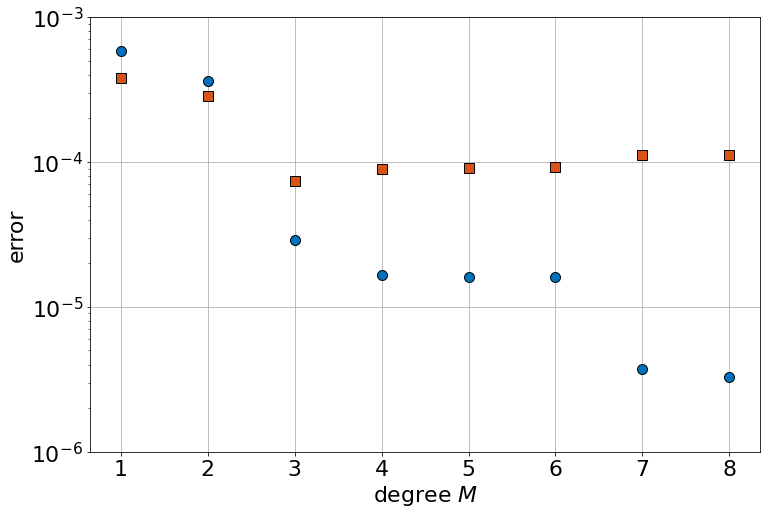

In [48]:
N = len(ts)

def error(pn, data):
    return (1/(2*N))*np.sum((pn-data)**2)

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(12, 8))

# least squares
for M in range(1,9):
    
    ks = np.zeros(M+1)
    xts = np.zeros(M+1)
    A = np.ones((M+1,M+1))
    
    for j in range(M+1):
        # generate A
        for k in range(M+1):
            A[j,k] = (ts**(j+k)).mean()
        
        # generate xt means
        xts[j] = (xtrain*(ts)**j).mean()
    
    # solve for coefficients
    ks = la.solve(A,xts)
    
    # regression fit
    poly = np.zeros(N)
    for i in range(M+1):
        poly += ks[i]*(ts)**i

    #plotting
    plt.plot(M, error(poly, xtrain), '-ko', markersize=10, markerfacecolor=(0, 0.447, 0.741, 1), label='training data')
    plt.plot(M, error(poly, xtest), '-ks', markersize=10, markerfacecolor=(0.85, 0.325, 0.098, 1), label='test data')

plt.xlabel(r"degree $M$")
plt.ylabel(r"error")
plt.yscale("log")
plt.ylim([1e-6, 1e-3])
plt.grid()

**Exercise 5.3**

In [51]:
n = 5000
W = np.zeros(n)
W[0] = 1

c = 0.4
phi = 0.6
phi_eps = 0.1

for i in range(1,n):
    W[i] = c + phi*W[i-1] + np.random.normal(0,phi_eps)

In [56]:
from statistics import variance

print('mean (observed): %.4f' % W.mean())
print('mean (theoretical): %.4f' % (c/(1-phi)))
print('variance (observed): %.4f' % variance(W))
print('mean (theoretical): %.4f' % (phi_eps**2/(1-phi**2)))

mean (observed): 0.9992
mean (theoretical): 1.0000
variance (observed): 0.0160
mean (theoretical): 0.0156


In [67]:
from statsmodels.tsa import stattools

gamma = stattools.acovf(W)

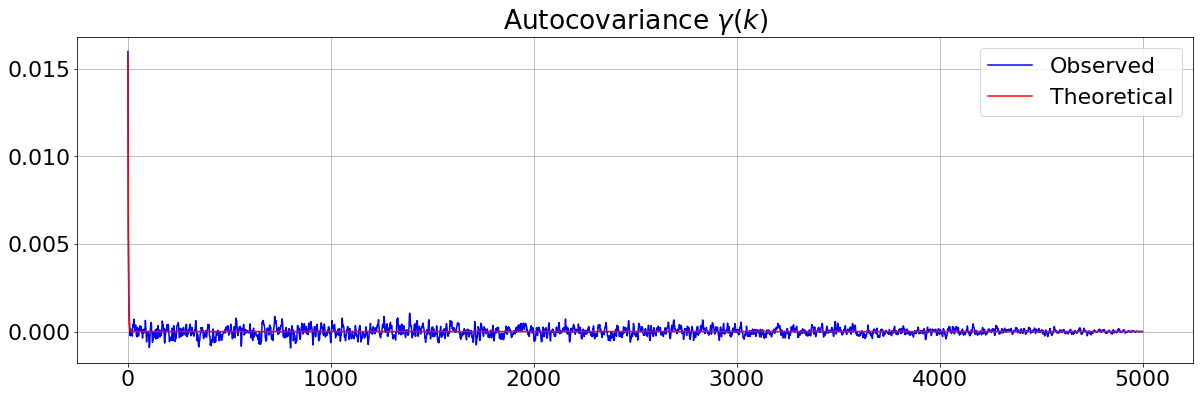

In [75]:
k = np.arange(0,n)

fig = plt.figure(figsize=(20,6))

plt.plot(k, gamma, 'b', label='Observed')
plt.plot(k, phi**k*(phi_eps**2/(1-phi**2)), 'r', label='Theoretical')
plt.legend(loc=0)
plt.title('Autocovariance $\gamma (k)$')
plt.grid()

**Exercise 5.4**

In [76]:
# first order autoregressive model
c = 0
phi = 0.9
sig = 2
n = 100000

W = np.zeros(n)
W[0] = 1

for i in range(1,n):
    W[i] = c + phi*W[i-1] + np.random.normal(0,sig)

In [83]:
# sample mean distributions
smean1 = np.zeros(int(n/10))
smean2 = np.zeros(int(n/10))

for j in range(int(n/10)):
    smean1[j] = W[j:j+10].mean()
    smean2[j] = np.random.choice(W, size=10).mean()

In [91]:
print('mean (observed): %.4f' % W.mean())
print('mean (theoretical): %.4f' % (c/(1-phi)))

mean (observed): 0.1284
mean (theoretical): 0.0000


<AxesSubplot:ylabel='Count'>

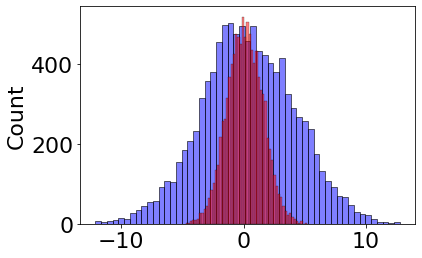

In [92]:
sns.histplot(smean1, color='b', alpha=0.5)
sns.histplot(smean2, color='r', alpha=0.5)

**Exercise 5.5**

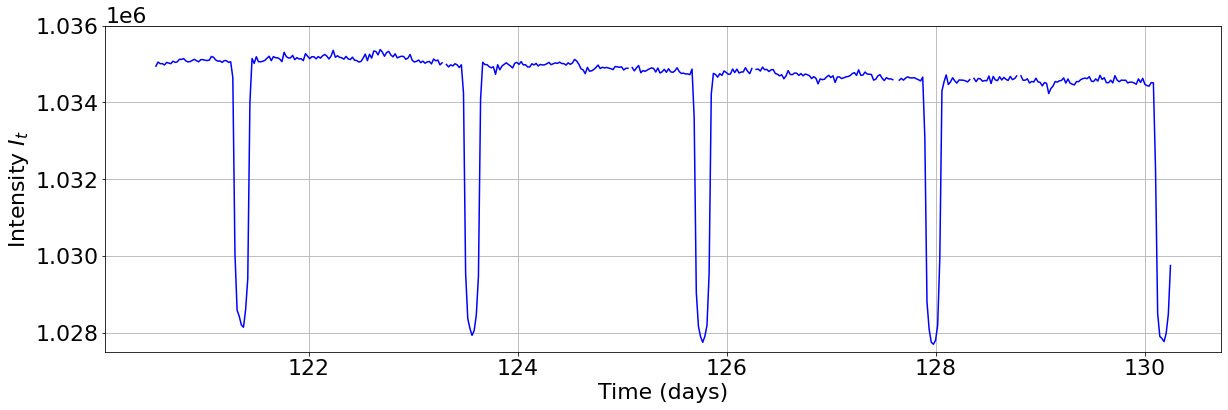

In [125]:
exoplanet = np.genfromtxt('./exoplanet-data.txt')

fig = plt.figure(figsize=(20,6))
plt.plot(exoplanet[:,0],exoplanet[:,1],'b')
plt.xlabel('Time (days)')
plt.ylabel('Intensity $I_t$')
#plt.xlim([127.95,130.15])
plt.ylim([1.0275e6,1.036e6])
plt.grid()

estimating an orbital period of roughly 2.2 days

In [131]:
mins = np.zeros(5)

j = 0
for i in range(0,500,100):
    mins[j] = np.nanmin(exoplanet[i:i+100,1])
    j += 1

a = mins.mean()

In [132]:
regseries = exoplanet[exoplanet[:,1] > 1.034e6]
b = regseries[:,1].mean()

In [133]:
a/b

0.9932442673191233